In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from pandas.plotting import scatter_matrix

/Users/light0617/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Part 1: Load & Clean the Data

In [2]:
ibm_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
stack_overflow_data = pd.read_csv('data/stack-overflow-developer-survey-2017/survey_results_public.csv')

In [3]:
# print len(list(stack_overflow_data))
# for col, types in zip(list(stack_overflow_data), list(stack_overflow_data.dtypes))[60:]:
#     #if types != object: continue
#     if types == object: continue
#     print col, '===================='
# #     for x in stack_overflow_data[col].unique():
# #         print x

In [4]:
# print len(list(ibm_data))
# for col, types in zip(list(ibm_data), list(ibm_data.dtypes))[28:]:
#     print col, '===================='
# #     if types != object: continue
# #     for x in ibm_data[col].unique():
# #         print x

## We will take the following columns to analyze in stack_overflow
### Professional, ProgramHobby, Country, FormalEducation, MajorUndergrad, CompanySize, DeveloperType, ProblemSolving, TabsSpaces, VersionControl, EnjoyDebugging, CheckInCode, DifficultCommunication, Gender, HighestEducationParents, Race, CareerSatisfaction, JobSatisfaction, HoursPerWeek, StackOverflowSatisfaction, Salary, ExpectedSalary

In [5]:
stack_overflow_columns = ['Professional', 'ProgramHobby', 'Country', 'FormalEducation', 'MajorUndergrad', 'CompanySize',\
                          'DeveloperType', 'ProblemSolving', 'TabsSpaces', 'VersionControl', 'EnjoyDebugging',\
                          'CheckInCode', 'DifficultCommunication', 'Gender', 'HighestEducationParents', 'Race',\
                          'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction',\
                          'Salary']

## We will take the following columns to analyze in IBM
### Age, Attrition, EducationField, Gender, JobRole, MaritalStatus, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, OverTime, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [6]:
# Renaming the columns of the dataframe
ibm_df_columns = ["Age", "Attrition", "EducationField", "Gender", "JobRole", "MaritalStatus",\
              "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", 'JobSatisfaction',\
             'MonthlyIncome', 'MonthlyRate', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',\
             'TotalWorkingYears', 'YearsAtCompany', 'TrainingTimesLastYear', 'WorkLifeBalance',\
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Choose specific columns to analyze

In [7]:
ibm_df = ibm_data[ibm_df_columns]
stackOverflow_df = stack_overflow_data[stack_overflow_columns]

In [8]:
print len(ibm_df_columns)
print ibm_data.shape
print ibm_df.shape
print stack_overflow_data.shape
print stackOverflow_df.shape
assert len(list(ibm_df)) == 24
assert len(list(stackOverflow_df)) == 21

24
(1470, 35)
(1470, 24)
(51392, 154)
(51392, 21)


In [9]:
# Check the first few rows of the 'isnull' IBM dataframe
ibm_df.isnull().head(5)

,Age,Attrition,EducationField,Gender,JobRole,MaritalStatus,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsAtCompany,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Check the first few rows of the 'isnull' stackOverflow dataframe
stackOverflow_df.isnull().head(5)

,Professional,ProgramHobby,Country,FormalEducation,MajorUndergrad,CompanySize,DeveloperType,ProblemSolving,TabsSpaces,VersionControl,...,CheckInCode,DifficultCommunication,Gender,HighestEducationParents,Race,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
0,False,False,False,False,True,True,True,False,False,True,...,True,True,False,False,False,True,True,False,False,True
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,True,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,False,False,True,True,True


### IBM dataframe is super clear!
no null in the dataframe

In [11]:
rows_to_drop = ibm_df[ibm_df.isnull().any(axis=1)]
print rows_to_drop

Empty DataFrame
Columns: [Age, Attrition, EducationField, Gender, JobRole, MaritalStatus, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, OverTime, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 24 columns]


### stackOverflow_df dataframe is very noisy!
no null in the dataframe

In [12]:
print 'total shape=', stackOverflow_df.shape
rows_to_drop = stackOverflow_df[stackOverflow_df.isnull().any(axis=1)]
print 'should be drop shape=', rows_to_drop.shape
rows_to_drop = stackOverflow_df[stackOverflow_df.isnull().all(axis=1)]
print 'should be drop shape=', rows_to_drop.shape

total shape= (51392, 21)
should be drop shape= (49369, 21)
should be drop shape= (0, 21)


### drop the salary data is null

In [13]:
rows_to_drop = stackOverflow_df[stackOverflow_df.Salary.isnull()]
print 'null salary data shpae', rows_to_drop.shape

# nullCountArray = [ (x, stackOverflow_df[x].isnull().sum()) for x in stackOverflow_df.columns]
# nullCountArray = sorted(nullCountArray, key = lambda x : -x[1])
# for x in nullCountArray:
#     print x
print type(rows_to_drop)

null salary data shpae (38501, 21)
<class 'pandas.core.frame.DataFrame'>


In [14]:
stackOverflow_df1= stackOverflow_df.drop(rows_to_drop.index)
assert stackOverflow_df1.shape == (12891, 21)

### there still are many null in the dataframe

In [15]:
nullCountArray = [ (x, stackOverflow_df1[x].isnull().sum()) for x in stackOverflow_df1.columns]
nullCountArray = sorted(nullCountArray, key = lambda x : -x[1])
for x in nullCountArray:
    print x

('HoursPerWeek', 7206)
('DifficultCommunication', 4083)
('EnjoyDebugging', 4077)
('ProblemSolving', 4013)
('VersionControl', 3984)
('CheckInCode', 3966)
('Race', 1613)
('HighestEducationParents', 1188)
('Gender', 1182)
('MajorUndergrad', 927)
('StackOverflowSatisfaction', 874)
('TabsSpaces', 465)
('JobSatisfaction', 39)
('CareerSatisfaction', 30)
('CompanySize', 11)
('DeveloperType', 2)
('Professional', 0)
('ProgramHobby', 0)
('Country', 0)
('FormalEducation', 0)
('Salary', 0)


## standardize
### nothing to standardize in IBM data, the category number is few and reasonable

In [16]:
for x, types in zip(ibm_df.columns, list(ibm_df.dtypes)):
    if types == object:
        print x
        print ibm_df[x].unique()

Attrition
['Yes' 'No']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
OverTime
['Yes' 'No']


# Part 2: Exploratory Data Vizualization

In this part, we will do exploratory data visualization.

In [17]:
ibm_df_int_type_col = [x for x, y in zip(ibm_df.columns, list(ibm_df.dtypes)) if y != object]
ibm_num_df = ibm_df[ibm_df_int_type_col]
print 'original shape=', ibm_df.shape, 'after getting only int type dataframe=', ibm_num_df.shape

original shape= (1470, 24) after getting only int type dataframe= (1470, 20)


In [20]:
ibm_num_core_df = ibm_num_df[['Age', 'HourlyRate', 'MonthlyIncome', 'TotalWorkingYears']]

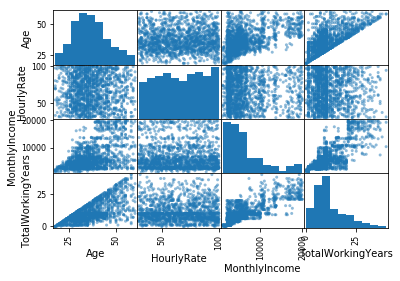

In [21]:
from pandas.plotting import scatter_matrix
fig = scatter_matrix(ibm_num_core_df)